<a href="https://colab.research.google.com/github/CoderJuan21/C-112/blob/main/C_112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Juan")

Juan


In [ ]:
print("Code makes me hungry")

Code makes me hungry


In [ ]:
from google.colab import files 
data = files.upload()

Saving C-112.csv to C-112.csv


In [ ]:
import plotly.express as px
import pandas as pd
import csv

df = pd.read_csv("C-112.csv")

fig = px.scatter(df, y = "quant_saved", color = "rem_any")
fig.show()

In [ ]:
import csv
with open ("C-112.csv", newline= "") as f:
  reader = csv.reader(f)
  saving_data = list(reader)

saving_data.pop(0)
total_entries = len(saving_data)
total_people_given_reminder = 0
for data in saving_data:
  if int(data[3]) == 1:
    total_people_given_reminder += 1

import plotly.graph_objects as go
fig = go.Figure(go.Bar(x = ["Reminded", "Not Reminded"], y = [total_people_given_reminder, (total_entries - total_people_given_reminder)]))
fig.show()


In [ ]:
import statistics
all_savings = []
for data in saving_data:
  all_savings.append(float(data[0]))
print(f"mean of savings -{statistics.mean(all_savings)}")
print(f"median of savings -{statistics.median(all_savings)}")
print(f"mode of savings -{statistics.mode(all_savings)}")

mean of savings -85.32780331328739
median of savings -39.2724
mode of savings -0.0


In [ ]:
reminded_savings = []
not_reminded_savings = []

for data in saving_data:
  if int(data[3]) == 1:
    reminded_savings.append(float(data[0]))
  else:
    not_reminded_savings.append(float(data[0]))

print("results for people who were reminded to save")
print(f"mean of savings -{statistics.mean(reminded_savings)}")
print(f"median of savings -{statistics.median(reminded_savings)}")
print(f"mode of savings -{statistics.mode(reminded_savings)}")

print("results for people who were not reminded to save")
print(f"mean of savings -{statistics.mean(not_reminded_savings)}")
print(f"median of savings -{statistics.median(not_reminded_savings)}")
print(f"mode of savings -{statistics.mode(not_reminded_savings)}")



results for people who were reminded to save
mean of savings -82.56940908263547
median of savings -39.2724
mode of savings -0.0
results for people who were not reminded to save
mean of savings -89.67095185226523
median of savings -36.0475
mode of savings -0.0


In [ ]:
print(f"standard dev of all savings -{statistics.stdev(all_savings)}")
print(f"standard dev of people who were reminded  -{statistics.stdev(reminded_savings)}")
print(f"standard dev of savings of people who were NOT reminded -{statistics.stdev(not_reminded_savings)}")

standard dev of all savings -196.75453011909315
standard dev of people who were reminded  -173.24866414440817
standard dev of savings of people who were NOT reminded -228.875050299707


In [ ]:
import numpy as np
age = []
savings = []
for data in saving_data:
  if float(data[5]) != 0:
    age.append(float(data[5]))
    savings.append(float(data[0]))
correlation = np.corrcoef(age, savings)  
print(f"correlation between age of person and their savings is -{correlation[0,1]}")

correlation between age of person and their savings is -0.03663447975985462


In [ ]:
import plotly.figure_factory as ff
fig = ff.create_distplot([df["quant_saved"].tolist()], ["savings"], show_hist = False)
fig.show()

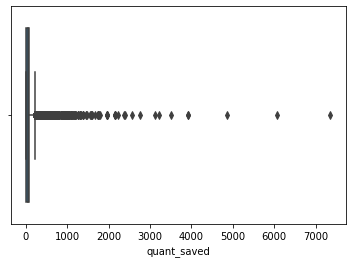

In [ ]:
#C-113
import seaborn as sns

sns.boxplot(data = df, x = df["quant_saved"])

In [ ]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)

iqr = q3 - q1
print(f"q1 - {q1}")
print(f"q3 - {q3}")
print(f"iqr - {iqr}")

q1 - 2.2840000000000003
q3 - 86.514
iqr - 84.22999999999999


In [ ]:
lower_value = q1 - 1.5 * iqr
upper_value = q3 + 1.5 * iqr

print(f"lower value - {lower_value}")

print(f"upper value - {upper_value}")

new_df = df[df["quant_saved"]<upper_value]

lower value - -124.06099999999998
upper value - 212.85899999999998


In [ ]:
all_savings = new_df["quant_saved"].tolist()

print(f"mean of savings -{statistics.mean(all_savings)}")
print(f"median of savings -{statistics.median(all_savings)}")
print(f"mode of savings -{statistics.mode(all_savings)}")
print(f"stdev of savings -{statistics.stdev(all_savings)}")
fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["savings"], show_hist = False)
fig.show()

mean of savings -46.200519389818794
median of savings -36.0475
mode of savings -0.0
stdev of savings -50.866871917288634


In [ ]:
import random
sampling_mean_list = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))
mean_sampling = statistics.mean(sampling_mean_list)
fig = ff.create_distplot([sampling_mean_list], ["savings"], show_hist = False)
fig.add_trace(go.Scatter(x = [mean_sampling, mean_sampling], y = [0,0.1], mode = "lines", name = "MEAN"))
fig.show()
print(f"stdev of savings -{statistics.stdev(sampling_mean_list)}")

stdev of savings -5.190141617756243


In [ ]:
print(f"mean of savings -{statistics.mean(all_savings)}")
print(f"mean of sampling distrubution - {mean_sampling}")

mean of savings -46.200519389818794
mean of sampling distrubution - 46.2837312484588


In [ ]:
import numpy as np
temp_df = new_df[new_df.age != 0 ]
age = temp_df["age"].tolist()
savings = temp_df["quant_saved"]

correlation = np.corrcoef(age, savings)  
print(f"correlation between age of person and their savings is -{correlation[0,1]}")

correlation between age of person and their savings is -0.08561544120342093


In [ ]:
reminded_df = new_df.loc[new_df["rem_any"]==1]
not_reminded_df = new_df.loc[new_df["rem_any"]==0]

print(reminded_df.head())
print(not_reminded_df.head(0))

fig = ff.create_distplot([not_reminded_df["quant_saved"].tolist()], ["savings"], show_hist = False)
fig.show()

   quant_saved  female  highschool_completed  rem_any  wealthy   age
0      13.0908       1                     0        1        0  28.0
1      39.2724       0                     1        1        1   0.0
3      58.9086       1                     1        1        1   0.0
4      78.5448       1                     1        1        1   0.0
5      39.2724       1                     1        1        1  43.0
Empty DataFrame
Columns: [quant_saved, female, highschool_completed, rem_any, wealthy, age]
Index: []


In [ ]:
not_reminded_savings = not_reminded_df["quant_saved"].tolist()

import random
sampling_mean_list_not_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))
mean_sampling_not_reminded = statistics.mean(sampling_mean_list_not_reminded)
stdev_sampling_not_reminded = statistics.stdev(sampling_mean_list_not_reminded)
print(f"mean of savings -{mean_sampling_not_reminded}")
print(f"stdev of savings -{stdev_sampling_not_reminded}" )
fig = ff.create_distplot([sampling_mean_list_not_reminded], ["savings"], show_hist = False)
fig.add_trace(go.Scatter(x = [mean_sampling, mean_sampling], y = [0,0.1], mode = "lines", name = "MEAN"))
fig.show()

mean of savings -43.59148881596848
stdev of savings -5.05807449380308


In [ ]:
first_sd_start = mean_sampling_not_reminded - stdev_sampling_not_reminded
first_sd_end = mean_sampling_not_reminded + stdev_sampling_not_reminded
print(f"first-{first_sd_start} and first (end) - {first_sd_end}")

second_sd_start = mean_sampling_not_reminded -(2* stdev_sampling_not_reminded)
second_sd_end = mean_sampling_not_reminded +(2* stdev_sampling_not_reminded)
print(f"second-{second_sd_start} and second (end) - {second_sd_end}")

third_sd_start = mean_sampling_not_reminded -(3* stdev_sampling_not_reminded)
third_sd_end = mean_sampling_not_reminded +(3* stdev_sampling_not_reminded)
print(f"third-{first_sd_start} and third (end) - {third_sd_end}")



first-38.5334143221654 and first (end) - 48.649563309771565
second-33.47533982836232 and second (end) - 53.70763780357464
third-38.5334143221654 and third (end) - 58.76571229737772


In [ ]:
reminded_savings = reminded_df["quant_saved"].tolist()

import random
sampling_mean_list_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(reminded_savings))
  sampling_mean_list_reminded.append(statistics.mean(temp_list))
mean_sampling_reminded = statistics.mean(sampling_mean_list_reminded)
stdev_sampling_reminded = statistics.stdev(sampling_mean_list_reminded)
print(f"mean of savings -{mean_sampling_reminded}")
print(f"stdev of savings -{stdev_sampling_reminded}" )
fig = ff.create_distplot([sampling_mean_list_reminded], ["savings"], show_hist = False)
fig.add_trace(go.Scatter(x = [mean_sampling, mean_sampling], y = [0,0.1], mode = "lines", name = "MEAN"))
fig.show()


mean of savings -47.46219643419744
stdev of savings -5.049789846559124


In [ ]:
z_score = (mean_sampling_reminded - mean_sampling_not_reminded)/ stdev_sampling_not_reminded
print(f"Z SCORE IS -{z_score}")

Z SCORE IS -0.7652531853714627
